# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn

In [3]:
aluguel_estimado = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/Dados CSV/aluguel_estimado.csv', delimiter=',')

In [4]:
aluguel_estimado

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,V9001,V9002,V8000,V9010,V9011,DEFLATOR,V8000_DEFLA,COD_IMPUT_VALOR,FATOR_ANUALIZACAO,PESO,PESO_FINAL,RENDA_TOTAL
0,11,1103,1,110005400,1,1,0,101,11,2000.0,9,12,1.000853,2001.71,0,1,272.806669,372.984516,11254.75
1,11,1103,1,110005400,4,1,0,101,11,500.0,10,12,0.999417,499.71,0,1,272.806669,372.984516,4769.13
2,11,1103,1,110005400,5,1,0,101,11,300.0,10,12,0.999417,299.83,0,1,272.806669,372.984516,2313.61
3,11,1103,1,110005400,6,1,0,101,11,400.0,10,12,0.999417,399.77,0,1,272.806669,372.984516,6596.90
4,11,1103,1,110005400,7,1,0,101,11,200.0,10,12,0.999209,199.84,0,1,272.806669,372.984516,366.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48930,53,5306,1,530025746,8,1,0,101,11,1200.0,10,12,1.004544,1205.45,0,1,506.403820,620.212733,2692.17
48931,53,5306,1,530025746,9,1,0,101,11,4000.0,11,12,1.003230,4012.92,0,1,506.403820,620.212733,33566.71
48932,53,5306,1,530025746,10,1,0,101,11,3500.0,11,12,1.002055,3507.19,0,1,506.403820,620.212733,39756.66
48933,53,5306,1,530025746,12,1,0,101,11,2500.0,11,12,0.998716,2496.79,0,1,506.403820,620.212733,44369.03


In [5]:
aluguel_estimado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48935 entries, 0 to 48934
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UF                 48935 non-null  int64  
 1   ESTRATO_POF        48935 non-null  int64  
 2   TIPO_SITUACAO_REG  48935 non-null  int64  
 3   COD_UPA            48935 non-null  int64  
 4   NUM_DOM            48935 non-null  int64  
 5   NUM_UC             48935 non-null  int64  
 6   QUADRO             48935 non-null  int64  
 7   V9001              48935 non-null  int64  
 8   V9002              48935 non-null  int64  
 9   V8000              48935 non-null  float64
 10  V9010              48935 non-null  int64  
 11  V9011              48935 non-null  int64  
 12  DEFLATOR           48935 non-null  float64
 13  V8000_DEFLA        48935 non-null  float64
 14  COD_IMPUT_VALOR    48935 non-null  int64  
 15  FATOR_ANUALIZACAO  48935 non-null  int64  
 16  PESO               489

In [6]:
aluguel_estimado['UF'] = aluguel_estimado['UF'].replace({11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17:'Tocantins', 21:'Maranhão', 22:'Piauí', 23:'Ceará', 24:'Rio Grande do Norte', 25:'Paraíba', 26:'Pernambuco', 27:'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'Espírito Santo', 33:"Rio de Janeiro", 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina', 43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52: 'Goiás', 53:'Distrito Federal'})

aluguel_estimado

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,V9001,V9002,V8000,V9010,V9011,DEFLATOR,V8000_DEFLA,COD_IMPUT_VALOR,FATOR_ANUALIZACAO,PESO,PESO_FINAL,RENDA_TOTAL
0,Rondônia,1103,1,110005400,1,1,0,101,11,2000.0,9,12,1.000853,2001.71,0,1,272.806669,372.984516,11254.75
1,Rondônia,1103,1,110005400,4,1,0,101,11,500.0,10,12,0.999417,499.71,0,1,272.806669,372.984516,4769.13
2,Rondônia,1103,1,110005400,5,1,0,101,11,300.0,10,12,0.999417,299.83,0,1,272.806669,372.984516,2313.61
3,Rondônia,1103,1,110005400,6,1,0,101,11,400.0,10,12,0.999417,399.77,0,1,272.806669,372.984516,6596.90
4,Rondônia,1103,1,110005400,7,1,0,101,11,200.0,10,12,0.999209,199.84,0,1,272.806669,372.984516,366.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48930,Distrito Federal,5306,1,530025746,8,1,0,101,11,1200.0,10,12,1.004544,1205.45,0,1,506.403820,620.212733,2692.17
48931,Distrito Federal,5306,1,530025746,9,1,0,101,11,4000.0,11,12,1.003230,4012.92,0,1,506.403820,620.212733,33566.71
48932,Distrito Federal,5306,1,530025746,10,1,0,101,11,3500.0,11,12,1.002055,3507.19,0,1,506.403820,620.212733,39756.66
48933,Distrito Federal,5306,1,530025746,12,1,0,101,11,2500.0,11,12,0.998716,2496.79,0,1,506.403820,620.212733,44369.03


In [7]:
aluguel_estimado['TIPO_SITUACAO_REG'] = aluguel_estimado['TIPO_SITUACAO_REG'].replace({1: 'Urbano', 2: 'Rural'})

aluguel_estimado

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,V9001,V9002,V8000,V9010,V9011,DEFLATOR,V8000_DEFLA,COD_IMPUT_VALOR,FATOR_ANUALIZACAO,PESO,PESO_FINAL,RENDA_TOTAL
0,Rondônia,1103,Urbano,110005400,1,1,0,101,11,2000.0,9,12,1.000853,2001.71,0,1,272.806669,372.984516,11254.75
1,Rondônia,1103,Urbano,110005400,4,1,0,101,11,500.0,10,12,0.999417,499.71,0,1,272.806669,372.984516,4769.13
2,Rondônia,1103,Urbano,110005400,5,1,0,101,11,300.0,10,12,0.999417,299.83,0,1,272.806669,372.984516,2313.61
3,Rondônia,1103,Urbano,110005400,6,1,0,101,11,400.0,10,12,0.999417,399.77,0,1,272.806669,372.984516,6596.90
4,Rondônia,1103,Urbano,110005400,7,1,0,101,11,200.0,10,12,0.999209,199.84,0,1,272.806669,372.984516,366.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48930,Distrito Federal,5306,Urbano,530025746,8,1,0,101,11,1200.0,10,12,1.004544,1205.45,0,1,506.403820,620.212733,2692.17
48931,Distrito Federal,5306,Urbano,530025746,9,1,0,101,11,4000.0,11,12,1.003230,4012.92,0,1,506.403820,620.212733,33566.71
48932,Distrito Federal,5306,Urbano,530025746,10,1,0,101,11,3500.0,11,12,1.002055,3507.19,0,1,506.403820,620.212733,39756.66
48933,Distrito Federal,5306,Urbano,530025746,12,1,0,101,11,2500.0,11,12,0.998716,2496.79,0,1,506.403820,620.212733,44369.03


In [8]:
aluguel_estimado['COD_IMPUT_VALOR'] = aluguel_estimado['COD_IMPUT_VALOR'].replace({0: ' Valor não foi imputado', 1: 'Valor foi imputado'})

aluguel_estimado

,UF,ESTRATO_POF,TIPO_SITUACAO_REG,COD_UPA,NUM_DOM,NUM_UC,QUADRO,V9001,V9002,V8000,V9010,V9011,DEFLATOR,V8000_DEFLA,COD_IMPUT_VALOR,FATOR_ANUALIZACAO,PESO,PESO_FINAL,RENDA_TOTAL
0,Rondônia,1103,Urbano,110005400,1,1,0,101,11,2000.0,9,12,1.000853,2001.71,Valor não foi imputado,1,272.806669,372.984516,11254.75
1,Rondônia,1103,Urbano,110005400,4,1,0,101,11,500.0,10,12,0.999417,499.71,Valor não foi imputado,1,272.806669,372.984516,4769.13
2,Rondônia,1103,Urbano,110005400,5,1,0,101,11,300.0,10,12,0.999417,299.83,Valor não foi imputado,1,272.806669,372.984516,2313.61
3,Rondônia,1103,Urbano,110005400,6,1,0,101,11,400.0,10,12,0.999417,399.77,Valor não foi imputado,1,272.806669,372.984516,6596.90
4,Rondônia,1103,Urbano,110005400,7,1,0,101,11,200.0,10,12,0.999209,199.84,Valor não foi imputado,1,272.806669,372.984516,366.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48930,Distrito Federal,5306,Urbano,530025746,8,1,0,101,11,1200.0,10,12,1.004544,1205.45,Valor não foi imputado,1,506.403820,620.212733,2692.17
48931,Distrito Federal,5306,Urbano,530025746,9,1,0,101,11,4000.0,11,12,1.003230,4012.92,Valor não foi imputado,1,506.403820,620.212733,33566.71
48932,Distrito Federal,5306,Urbano,530025746,10,1,0,101,11,3500.0,11,12,1.002055,3507.19,Valor não foi imputado,1,506.403820,620.212733,39756.66
48933,Distrito Federal,5306,Urbano,530025746,12,1,0,101,11,2500.0,11,12,0.998716,2496.79,Valor não foi imputado,1,506.403820,620.212733,44369.03


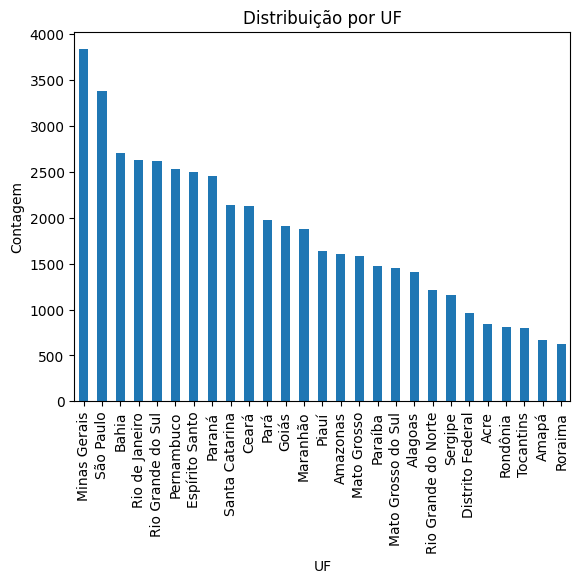

In [9]:
aluguel_estimado['UF'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()

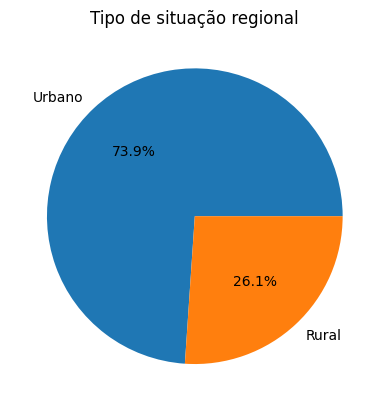

In [13]:
aluguel_estimado['TIPO_SITUACAO_REG'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Tipo de situação regional")
plt.gca().set_ylabel('')
plt.show()

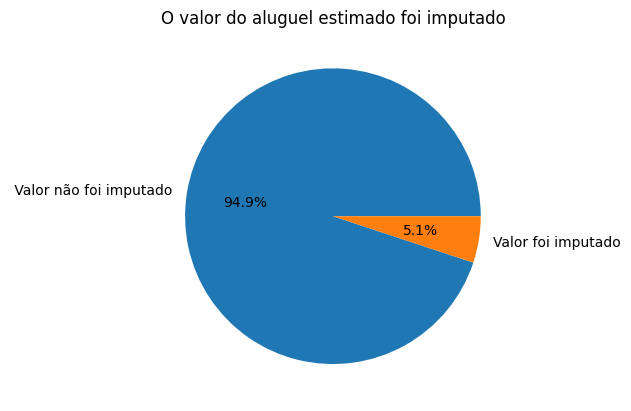

In [12]:
aluguel_estimado['COD_IMPUT_VALOR'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("O valor do aluguel estimado foi imputado")
plt.gca().set_ylabel('')
plt.show()